<h1>1. Exploring the Dataset</h1>

<h2>1.1 Understanding the Data</h2>

Analisi degli attributi:
- preg = Pregnancies (Number of times pregnant)
- plas = Glucose (Plasma glucose concentration a 2 hours in an oral glucose tolerance test)
- pres = Blood pressure (Diastolic blood pressure (mm Hg))
- skin = SkinThickness (Triceps skin fold thickness (mm))
- test = Insulinic test (2-Hour serum insulin (mu U/ml))
- mass = BMI (Body mass index (weight in kg/(height in m)^2))
- pedi = Diabetes pedigree function
- age = Age (years)
- class = Class variable (0=no diabete or 1=diabete)

<h2>1.2 Loading Data</h2>

In [34]:
from pandas import read_csv
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
data = read_csv('dataset/pima-indians-diabetes.csv', names=names, header=0) # Carica il dataset ignorando la prima riga del header

<h2>1.3 Peeking Data</h2>

Rows:
<ul>
  <li>Too many --> algorithms may take too long to train</li>
  <li>Too few --> perhaps you do not have enough data to train the algorithms</li>
</ul>  
Features:
<ul>
  <li>Too many -->some algorithms can be distracted or suffer poor performance due to the curse of dimensionality.</li>
  <li>Too few --> perhaps aren't enough to train the algorithms</li>
</ul> 


In [35]:
''' Analisi primarie '''
print("Il dataset è composto da", data.shape[0], "righe e", data.shape[1], "colonne")
print(data.head(10)) # Stampa le prime 10 righe dell'intero dataset

Il dataset è composto da 768 righe e 9 colonne
   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115     0     0     0  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96     0     0   0.0  0.232   54      1


<h2>1.4 Statistics</h2>

We can use some statistics technique to understand better our datas.<br>
Ask why are you seeing those specific numbers and think about how the numbers relate to the problem domain in general and specific entities that observations relate to.<br>
Keep a small text file or note pad and jot down all of the ideas for how variables may relate, for what numbers mean, and ideas for techniques to try later. The things you write down now while the data is fresh will be very valuable later when you are trying to think up new things to try

<h3>1.4.1 Descriptive Statistics</h3>

Descriptive statistics can give you great insight into the shape of each attribute

In [36]:
from pandas import set_option
set_option('display.width', 100) # Rende più visibile il risultato
set_option('precision', 3) # Arrotonda alla 3° cifra decimale

print(data.describe()) # Calcola la media, std, min, max e percentile di ciascun attributo
# print(data[['preg', 'skin']].describe()) # Calcola le statistiche su attributi specifici


          preg     plas     pres     skin     test     mass     pedi      age    class
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000
mean     3.845  120.895   69.105   20.536   79.799   31.993    0.472   33.241    0.349
std      3.370   31.973   19.356   15.952  115.244    7.884    0.331   11.760    0.477
min      0.000    0.000    0.000    0.000    0.000    0.000    0.078   21.000    0.000
25%      1.000   99.000   62.000    0.000    0.000   27.300    0.244   24.000    0.000
50%      3.000  117.000   72.000   23.000   30.500   32.000    0.372   29.000    0.000
75%      6.000  140.250   80.000   32.000  127.250   36.600    0.626   41.000    1.000
max     17.000  199.000  122.000   99.000  846.000   67.100    2.420   81.000    1.000


<h3>1.4.2 Analyze Class Distribution (Classification Only)</h3>

On classification problems you need to know how balanced the class values are. 

In [37]:
print(data.groupby('class').size() / data.shape[0]) # Mostra la distribuzione di ciascuna class label

class
0    0.651
1    0.349
dtype: float64


<h3>1.4.3 Feature Correlation</h3>

Some machine learning algorithms like linear and logistic regression can suffer poor performance if there are highly correlated attributes in your dataset.<br>
We can use the Pearson’s Correlation Coefficient, that assumes a normal distribution of the attributes involved. A correlation of -1 or 1 shows a full negative or positive correlation respectively, whereas a value of 0 shows no correlation at all.

In [38]:
print(data.corr(method='pearson'))

        preg   plas   pres   skin   test   mass   pedi    age  class
preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544  0.222
plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264  0.467
pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240  0.065
skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114  0.075
test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042  0.131
mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036  0.293
pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034  0.174
age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000  0.238
class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238  1.000


<h3>1.4.4 Skew of Univariate Distributions</h3>

Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another.<br>
Many machine learning algorithms assume a Gaussian distribution.<br>
Knowing that an attribute has a skew may allow you to perform data preparation to correct the skew and later improve the accuracy of your models.<br>
<ul>
  <li>Positive --> right skew</li>
  <li>Negative --> left skew</li>
  <li>Closer to zero --> less / symmetric skew</li>
</ul>  

In [39]:
print(data.skew())

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64


<h3>1.4.5 Univariate Plots</h3>


<h4>1.4.5.1 Histograms</h4>
<p>A fast way to get an idea of the distribution of each attribute is to look at histograms.<br>
From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution.</p>
<p>It can also help you see possible outliers.</p>

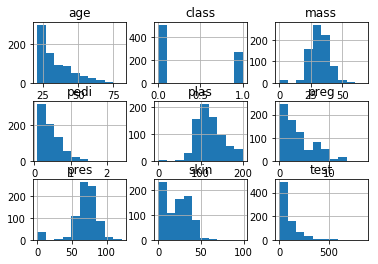

In [40]:
from matplotlib import pyplot
data.hist()
pyplot.show()

# Notice how the attributes age, pedi and test may have an exponential distribution. 
# We can also see that perhaps the mass and pres and plas attributes may have a Gaussian or nearly Gaussian distribution. 
# This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.


<h4>1.4.5.2 Density Plots</h4>

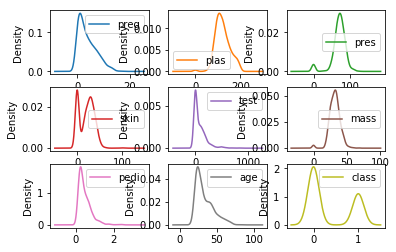

In [41]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()

<h1>2. Pre-processing</h1>

<p>Many machine learning algorithms make assumptions about your data.<br>
It is often a very good idea to prepare your data in such way to best expose the structure of the problem to the machine learning algorithms that you intend to use.</p>
<p>I would recommend creating many different views and transforms of your data, then exercise a handful of algorithms on each view of your dataset. This will help you to flush out which data transforms might be better at exposing the structure of your problem in general.</p>

<h2>2.1 Rescaling</h2>
<p>When your data is comprised of attributes with varying scales, many machine learning algorithms can benefit from rescaling the attributes to all have the same scale (usually between 0 and 1).</p>
<p>This is useful for optimization algorithms used in the core of machine learning algorithms like gradient descent. It is also useful for algorithms that weight inputs like regression and neural networks and algorithms that use distance measures like k-Nearest Neighbors.</p>

In [42]:
#The Fit and Multiple Transform method is the preferred approach. You call the fit() function to prepare the parameters of the transform once on your data. Then later you can use the transform() function on the same data to prepare it for modeling and again on the test or validation dataset or new data that you may see in the future. The Combined Fit-And-Transform is a convenience that you can use for one off tasks.
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions

array = data.values # Converte i valori del dataframe in una matrice di dati
X = array[:, 0:8] # Carica tutte le righe dei primi 8 attributi
Y = array[:, 8] # Carica tutte le righe dell'ultimo attributo (la class label)

scaler = MinMaxScaler(feature_range=(0, 1)) # Imposta lo scalatore MinMax (con range 0-1)
rescaledX = scaler.fit_transform(X) # Effettua il rescale su X

set_printoptions(precision=3) # Imposta una precisione a 3 per numpy (sklearn si basa su numpy) per una migliore lettura
print(rescaledX[0:10, :])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]
 [0.294 0.583 0.607 0.    0.    0.382 0.053 0.15 ]
 [0.176 0.392 0.41  0.323 0.104 0.462 0.073 0.083]
 [0.588 0.578 0.    0.    0.    0.526 0.024 0.133]
 [0.118 0.99  0.574 0.455 0.642 0.455 0.034 0.533]
 [0.471 0.628 0.787 0.    0.    0.    0.066 0.55 ]]


<h2>2.2 Standardize Data</h2>
<p>Standardization is a useful technique to transform attributes (with a Gaussian distribution and differing means and standard deviations) to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.</p>
<p>It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as linear regression, logistic regression and linear discriminate analysis.</p>

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X) # Imposta lo scalatore standard
standardizedX = scaler.transform(X) # Effettua la standardizzazione su X

set_printoptions(precision=3) # Imposta una precisione a 3 per numpy (sklearn si basa su numpy) per una migliore lettura
print(standardizedX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


<h2>2.3 Normalize Data</h2>
<p>We can also rescaling each observation (row) to have a length of 1 (called a unit norm or a vector with the length of 1 in linear algebra).</p>
<p>This pre-processing method can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as neural networks and algorithms that use distance measures such as k-Nearest Neighbors.</p>

In [44]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(X) # Imposta lo scalatore normale
normalizedX = scaler.transform(X) # Effettua la normalizzazione su X

set_printoptions(precision=3) # Imposta una precisione a 3 per numpy (sklearn si basa su numpy) per una migliore lettura
print(normalizedX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


<h2>2.4 Binarize Data</h2>
<p>We can transform the data such as all values above the threshold are marked 1 and all equal to or below are marked as 0.</p>
<p>It can be useful when we have probabilities that we want to make crisp values. <br>
It is also useful when feature engineering and you want to add new features that indicate something meaningful.</p>

In [45]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.5).fit(X) # Imposta la binarizzazione con soglia > a 0.5 --> 1
binaryX = binarizer.transform(X) # Effettua la binarizzazione su X

set_printoptions(precision=3) # Imposta una precisione a 3 per numpy (sklearn si basa su numpy) per una migliore lettura
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 0. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


<h1>3. Feature Selection</h1>
<p>The data features used to train our machine learning models have a huge influence on the performance we can achieve.<br>
Irrelevant or partially relevant features can negatively impact model performance.</p>

<p>Feature selection is a process where we automatically select those features in our data that contribute most to the prediction variable or output in which you are interested. <br>
Having irrelevant features in our data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.</p>

Pro:
  <li>Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.</li>
  <li>Improves Accuracy: Less misleading data means modeling accuracy improves.</li>
  <li>Reduces Training Time: Less data means that algorithms train faster.</li>

<h2>3.1 Univariate Selection</h2>
<p>Statistical tests can be used to select those features that have the strongest relationship with the output variable.</p>
<p>The scikit-learn library provides the <i>SelectKBest class</i> that can be used with a suite of different statistical tests to select a specific number of features.</p>
    
<p>The example below uses the chi-squared (chi2) statistical test for non-negative features to select 4 of the best features.</p>

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi_test = SelectKBest(score_func=chi2, k=4).fit(X, Y) # Seleziona i 4 migliori attributi mediante il test di chi-quadro
features = chi_test.transform(X) # Effettua il test di chi-quadro

set_printoptions(precision=3) # Imposta una precisione a 3 per numpy (sklearn si basa su numpy) per una migliore lettura
print("Punteggi:\n", chi_test.scores_, "\n")
print(features[0:5,:])

Punteggi:
 [ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304] 

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


<h2>3.2 Recursive Feature Elimination</h2>
<p>The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.<br>
It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.</p>

In [47]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() # Seleziona il modello di regressione logistica
rfe = RFE(model, 3) # Imposta la RFE sul modello di regressione richiedendo i 3 migliori attributi
fit = rfe.fit(X, Y)

print("Num Features:", fit.n_features_) # Visualizza il numero di feature selezionate
print("Selected Features:", fit.support_) # Visualizza le feature selezionate
print("Feature Ranking:", fit.ranking_) # Visualizza le feature in ordine di importanza (1 = feature già selezionata)

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


<h2>3.3 Principal Component Analysis</h2>
<p>Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form (generally called data reduction technique).<br>
A property of PCA is that we can choose the number of dimensions or principal components in the transformed result.

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3) # Imposta la PCA con un numero di componenti pari a 3
fit = pca.fit(X) # Applica la PCA ad X

print("Explained Variance:", fit.explained_variance_ratio_)
print("Components:\n", fit.components_)

Explained Variance: [0.889 0.062 0.026]
Components:
 [[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


<h2>3.4 Feature Importance</h2>
<p>Bagged decision trees (like Random Forest and Extra Trees) can be used to estimate the importance of features.</p>

In [49]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier() # Seleziona l'ETC model
model.fit(X, Y) # Applica l'ETC model ai dati

print(model.feature_importances_) # Visualizza l'importanza degli attributi (più il singolo valoretende ad 1 più è importante)
# In questo caso pare che gli attributi migliori risultino "plas" (con 0.242), "age" (con 0.138) and "mass" (con 0.136).

[0.112 0.204 0.096 0.078 0.083 0.156 0.123 0.148]


<h1>4. Evaluating ML Algorithms</h1>
<p>We need to know how well our algorithms perform on unseen data.<br>
The best way to evaluate the performance of an algorithm would be to make predictions for new data to which you already know the answers.</p>
<p>The second best way is to use clever techniques from statistics called resampling methods that allow you to make accurate estimates for how well your algorithm will perform on new data.</p>

We had four different techniques that we can use to split up our training dataset and create useful estimates of performance for our machine learning algorithms:
    <li>Train and Test Sets</li>
    <li>k-fold Cross Validation</li>
    <li>Leave One Out Cross Validation</li>
    <li>Repeated Random Test-Train Splits</li>

Hint:
<li>Using a train/test split is good for speed when using a slow algorithm and produces performance estimates with lower bias when using large datasets</li>
<li>Techniques like leave-one-out cross validation and repeated random splits can be useful intermediates when trying to balance variance in the estimated performance, model training speed and dataset size</li>
<li>The best advice is to experiment and find a technique for your problem that is fast and produces reasonable estimates of performance that you can use to make decisions</li>
<li>If in doubt, use 10-fold cross validation</li>

<h2>4.1 Split into Train and Test Sets</h2>
<p>The simplest method that we can use to evaluate the performance of a machine learning algorithm is to use different training and testing datasets.<br>
We can take our original dataset and split it into two parts. Train the algorithm on the first part, make predictions on the second part and evaluate the predictions against the expected results.</p>

<p>The size of the split can depend on the size and specifics of your dataset, although it is common to use 67% of the data for training and the remaining 33% for testing.</p>

PRO:
<ul>
    <li>This algorithm evaluation technique is very fast (ideal for large datasets (millions of records) where there is strong evidence that both splits of the data are representative of the underlying problem)</ul>
CONS:
<ul>
    <li>We can have a high variance (differences in the training and test dataset can result in meaningful differences in the estimate of accuracy)
</ul>

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

test_size = 0.33 # Il test set rappresenta il 33% del dataset totale
seed = 7 # Siccome la scelta dei campioni per il test set è casuale, fissiamo un seed per la riproducibilità dell'esperimento

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) # Creazione dei train e test set

model = LogisticRegression() # Selezione di un modello logistico
model.fit(X_train, Y_train) # Applicazione del modello logistico ai dati di training

result = model.score(X_test, Y_test) # Calcolo dell'accuracy
print("Accuracy:", round(result*100.0, 3))

Accuracy: 75.591


<h2>4.2 K-fold Cross Validation</h2>
<p>It works by splitting the dataset into k-parts (e.g. k = 5 or k = 10), where each split of the data is called a fold.<br>
The algorithm is trained on k − 1 folds with one held back and tested on the held back fold. This is repeated so that each fold of the dataset is given a chance to be the held back test set.<br>
After running cross validation you end up with k different performance scores that you can summarize using a mean and a standard deviation</p>

<p>The choice of k must allow the size of each test partition to be large enough to be a reasonable sample of the problem, whilst allowing enough repetitions of the train-test evaluation of the algorithm to provide a fair estimate of the algorithms performance on unseen data.</p><br>

PRO:
<li>Less variance than a single train-test set split</li>
<li>The result is a more accurate and we had a reliable estimate of the performance of the algorithm on new data.</li>
CONS:
<li>More test implies more computation</li>

<p>Hint: For modest sized datasets in the thousands or tens of thousands of records, k values of 3, 5 and 10 are common</p>

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

num_folds = 10 # Imposta la divisione del dataset in 10 parti
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True) # Imposta la kfold
model = LogisticRegression() # Crea un modello logistico
results = cross_val_score(model, X, Y, cv=kfold) # Applica la CV sul modello e sui dati

print("Accuracy:", round(results.mean()*100.0, 3))
print("Dev. Std:", round(results.std()*100.0, 3))

Accuracy: 77.086
Dev. Std: 5.091


<h2>4.3 Leave One Out Cross Validation</h2>
<p>Setting k-fold = 1 is also called leave-one-out cross validation</p>
<p>The result is a large number of performance measures that can be summarized in an effort to give a more reasonable estimate of the accuracy of your model on unseen data.</p>

PRO:
<li>Usefull when we had few datas</li>
CONS:
<li>Computationally expensive if we had a lot of data</li>


Hint: Use it only when you had little datasets

In [52]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

num_folds = 10 # Imposta la divisione del dataset in 10 parti

loocv = LeaveOneOut() # Imposta la leave one out
model = LogisticRegression() # Seleziona il modello logistico

print("Accuracy:", round(results.mean()*100.0, 3))
print("Dev. Std:", round(results.std()*100.0, 3))
# Notare l'alta std rispetto alla tecnica precedente

Accuracy: 77.086
Dev. Std: 5.091


<h2>4.4 Repeated Random Test-Train Splits</h2>
<p>Another variation on k-fold cross validation is to create a random split of the data like the train/test split described above, but repeat the process of splitting and evaluation of the algorithm multiple times, like cross validation</p>

PRO:
<li>Speed of using a train/test split and the reduction in variance in the estimated performance of k-fold cross validation.</li>

CONS:
<li>Repetitions may include much of the same data in the train or the test split from run to run, introducing redundancy into the evaluation.</li>

In [53]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

n_splits = 10 # Imposta la divisione del dataset in 10 parti
test_size = 0.3 # Il test set rappresenta il 33% del dataset totale
seed = 7

kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed) # Imposta la shufflesplit
model = LogisticRegression() # Seleziona il modello logistico
results = cross_val_score(model, X, Y, cv=kfold) # Applica la CV sul modello e sui dati

print("Accuracy:", round(results.mean()*100.0, 3))
print("Dev. Std:", round(results.std()*100.0, 3))
#Notiamo come abbia un'accuracy simile alla k-fold CV ma una bassissima dev. standard

Accuracy: 76.97
Dev. Std: 1.366


<h1>5. Performance Metrics</h1>
<p>The metrics that we choose to evaluate our machine learning algorithms are very important, because influences how the performance of machine learning algorithms is measured and compared.<br>
This influence which algorithm to choose.</p>

<p>We had 2 types of classification metrics:
    <li>For classification purpose</li>
    <li>For regression purpose</li>
</p>

<h2>5.1 Metrics for Classification Problems</h2>
<p>The main classification metrics are:
    <li>Classification Accuracy</li>
    <li>Logarithmic Loss</li>
    <li>Area Under ROC Curve</li>
    <li>Confusion Matrix</li>
    <li>Classification Report</li></p>

<h3>5.1.1 Classification Accuracy</h3>
<p>Classification accuracy is the number of correct predictions made as a ratio of all predictions made.<br>
    This is the most common evaluation metric for classification problems, it is also the most misused.</p>
    
<p>Hint: Use only there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important (which is often not the case)</p>


In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=7) # Imposta la kfold cv (k=10)
model = LogisticRegression() # Seleziona il modello logistico
results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy') # Applica la CV sul modello e sui dati e ne misura le performance mediante l'accuracy

print("Accuracy:", round(results.mean()*100.0, 3))
print("Dev. Std:", round(results.std()*100.0, 3))

Accuracy: 76.951
Dev. Std: 4.841


<h3>5.1.2 Logarithmic Loss</h3>
<p>Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities of membership to a given class.<br>
The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm.</p>
<p>Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction.</p>

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=7) # Imposta la kfold cv (k=10)
model = LogisticRegression() # Seleziona il modello logistico
results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_log_loss') # Applica la CV sul modello e sui dati e ne misura le performance mediante la logarithmic loss

print("Logloss:", round(results.mean()*100.0, 3))
print("Dev. Std:", round(results.std()*100.0, 3))

Logloss: -49.255
Dev. Std: 4.701


<h3>5.1.3 Area Under ROC Curve</h3>
<p>Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.</p>
<p>The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model that is as good as random.</p>
<p>ROC can be broken down into sensitivity and specificity, so, a binary classification problem is really a trade-off between sensitivity and specificity, where:
    <li>Sensitivity = true positive rate</li>
    <li>Specificity = true negative rate</li>

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=7) # Imposta la kfold cv (k=10)
model = LogisticRegression() # Seleziona il modello logistico
results = cross_val_score(model, X, Y, cv=kfold, scoring='roc_auc') # Applica la CV sul modello e sui dati e ne misura le performance mediante la logarithmic loss

print("AUC:", round(results.mean()*100.0, 3))
print("Dev. Std:", round(results.std()*100.0, 3))

AUC: 82.357
Dev. Std: 4.084


<h3>5.1.4 Confusion Matrix</h3>
<p>The confusion matrix is a handy presentation of the accuracy of a model with two or more classes</p>
<img src="images/ML/ML1.png" alt="Confusion Matrix" height="50%" width="50%">

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

test_size = 0.33
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression() # Seleziona il modello logistico
model.fit(X_train, Y_train) # Carica i dati nel modello logistico

predicted = model.predict(X_test) # Effettua le predizioni sul modello logistico sul test set
matrix = confusion_matrix(Y_test, predicted) # Misura le performance generando una confusion matrix
print(matrix)

[[141  21]
 [ 41  51]]


<h3>5.1.5 Classification Report</h3>
<p>The classification report displays the precision, recall, F1-score and support for each class.</p>

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression() # Seleziona il modello logistico
model.fit(X_train, Y_train) # Carica i dati nel modello logistico

predicted = model.predict(X_test) # Effettua le predizioni sul modello logistico sul test set
report = classification_report(Y_test, predicted) # Genera i risultati di precision, recall, f1 e support
print(report)

             precision    recall  f1-score   support

        0.0       0.77      0.87      0.82       162
        1.0       0.71      0.55      0.62        92

avg / total       0.75      0.76      0.75       254



<h2>5.2 Metrics for Regression Problems</h2>
<p>The main classification metrics are:
    <li>Mean Absolute Error</li>
    <li>Mean Squared Error</li>
    <li>R2</li>
</p>

n.b. For this metrics we will use a new dataset: Boston Prices

<h3>5.2.1 Mean Absolute Error</h3>
<p>The Mean Absolute Error (or MAE) is the sum of the absolute differences between predictions and actual values.</p><br>
PRO:
    <li>It gives an idea of how wrong the predictions were</li>

CONS:
    <li>It can't explain the direction of the error (e.g. over or under predicting)

In [59]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

names = ['Index', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv('dataset/Boston-full.csv', names=names, header=0) 
dataframe = dataframe.drop(columns=['Index'], axis=1) # Eliminiamo l'index dal dataset in quanto inutile ai fini della classificazione
array = dataframe.values # Converte la struttura del dataframe in una matrice
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)

model = LinearRegression() # Seleziona il modello logistico
results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_absolute_error') 

print("MAE:", round(results.mean(), 3))
print("Dev. Std:", round(results.std(), 3))
# A value of 0 indicates no error or perfect predictions.

MAE: -4.005
Dev. Std: 2.084


<h3>5.2.2 Mean Squared Error</h3>
<p>The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error.</p>
<p>Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation (called the Root Mean Squared Error (or RMSE))

In [60]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression() # Seleziona il modello logistico
results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')

print("MSE:", round(results.mean(), 3))
print("Dev. Std:", round(results.std(), 3))

MSE: -34.705
Dev. Std: 45.574


<h3>5.2.3 R2</h3>
<p>The R2 (or R Squared or Coefficient of Determination) metric provides an indication of the goodness of fit of a set of predictions to the actual values.<br>
This is a value between 0 and 1 for no-fit and perfect fit respectively.</p>

In [61]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression() # Seleziona il modello logistico
results = cross_val_score(model, X, Y, cv=kfold, scoring='r2')

print("MSE:", round(results.mean(), 3))
print("Dev. Std:", round(results.std(), 3))

MSE: 0.203
Dev. Std: 0.595


<h1>6. Spot-Checking</h1>
<p>Spot-checking is a way of discovering which algorithms perform well on our machine learning problem, because we cannot know which algorithms are best suited to your problem beforehand.</p>
<p>The question is: What algorithms should we spot-check on our dataset?<br>
    We must trial a number of methods and focus attention on those that prove themselves the most promising</p>

<p>Hint: trying a mixture of algorithms that might do well on our dataset and see what is good at picking out the structure in our data<p>

<h2>6.1 Strategy</h2>
<ul>
    <li>Try a mixture of algorithm representations (e.g. instances and trees)</li>
    <li>Try a mixture of learning algorithms (e.g. different algorithms for learning the same type
        of representation).</li>
    <li>Try a mixture of modeling types (e.g. linear and nonlinear functions or parametric and nonparametric)</li>
</ul>
    <p>We will test now some of them</p>

<h2>6.2 Spot-Checking (for Classification Problems)</h2>
<ul>
    <li>Try a mixture of algorithm representations (e.g. instances and trees)</li>
    <li>Try a mixture of learning algorithms (e.g. different algorithms for learning the same type
        of representation).</li>
    <li>Try a mixture of modeling types (e.g. linear and nonlinear functions or parametric and nonparametric)</li>
</ul>
    <p>We will test now some of them</p>

<h3>6.2.1 Linear Machine Learning Algorithms</h3>
<p>This section demonstrates minimal recipes for how to use some linear ML algorithms</p>


<h4>6.2.1.1 Logistic Regression</h4>
<p>Logistic regression assumes a Gaussian distribution for the numeric input variables and can model binary classification problems.</p>

In [67]:
# Logistic Regression Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv('dataset/pima-indians-diabetes.csv', names=names, header=0)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7695146958304853


<h4>6.2.1.2 Linear Discriminant Analysis</h4>
<p>Linear Discriminant Analysis (or LDA) is a statistical technique for binary and multiclass classification. It too assumes a Gaussian distribution for the numerical input variables.</p>

In [69]:
# LDA Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

kfold = KFold(n_splits=10, random_state=7)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.773462064251538


<h3>6.2.2 Nonlinear Machine Learning Algorithms</h3>
<p>This section demonstrates minimal recipes for how to use some non linear ML algorithms</p>

<h4>6.2.2.1 k-Nearest Neighbors</h4>
<p>The k-Nearest Neighbors algorithm (or KNN) uses a distance metric to find the k most similar instances in the training data for a new instance and takes the mean outcome of the neighbors as the prediction.</p>


In [70]:
# KNN Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7265550239234451


<h4>6.2.2.2 Naive Bayes</h4>
<p>Naive Bayes calculates the probability of each class and the conditional probability of each class given each input value. These probabilities are estimated for new data and multiplied together, assuming that they are all independent (a simple or naive assumption).<br>
When working with real-valued data, a Gaussian distribution is assumed to easily estimate the probabilities for input variables using the Gaussian Probability Density Function.</p>

In [71]:
# Gaussian Naive Bayes Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10, random_state=7)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7551777170198223


<h4>6.2.2.3 Classification and Regression Trees</h4>
<p>Classification and Regression Trees (CART or just decision trees) construct a binary tree from the training data. Split points are chosen greedily by evaluating each attribute and each value of each attribute in the training data in order to minimize a cost function (like the Gini index).</p>

In [72]:
# CART Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6952153110047847


<h4>6.2.2.4 Support Vector Machines</h4>
<p>Support Vector Machines (or SVM) seek a line that best separates two classes. Those data instances that are closest to the line that best separates the classes are called support vectors and influence where the line is placed. SVM has been extended to support multiple classes.<br>
A powerful Radial Basis Function is used by default.</p>

In [73]:
# SVM Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

kfold = KFold(n_splits=10, random_state=7)
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6510252904989747


<h2>6.3 Spot-Checking (for Regression Problems)</h2>
<ul>
    <li>Try a mixture of algorithm representations (e.g. instances and trees)</li>
    <li>Try a mixture of learning algorithms (e.g. different algorithms for learning the same type
        of representation).</li>
    <li>Try a mixture of modeling types (e.g. linear and nonlinear functions or parametric and nonparametric)</li>
</ul>
    <p>We will test now some of them</p>

<h3>6.3.1 Linear Machine Learning Algorithms</h3>
<p>This section demonstrates minimal recipes for how to use some linear ML algorithms</p>


<h4>6.3.1.1 Linear Regression</h4>
<p>Linear regression assumes that the input variables have a Gaussian distribution. It is also assumed that input variables are relevant to the output variable and that they are not highly correlated with each other (a problem called collinearity).</p>


In [77]:
# Linear Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

names = ['Index', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv('dataset/Boston-full.csv', names=names, header=0) 
dataframe = dataframe.drop(columns=['Index'], axis=1) # Eliminiamo l'index dal dataset in quanto inutile ai fini della classificazione
array = dataframe.values # Converte la struttura del dataframe in una matrice
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)

model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.705255944524986


<h4>6.3.1.2 Ridge Regression</h4>
<p>Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model measured as the sum squared value of the coefficient values (also called the L2-norm).</p>

In [79]:
# Ridge Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

kfold = KFold(n_splits=10, random_state=7)
model = Ridge()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.07824620925932


<h4>6.3.1.3 LASSO Regression</h4>
<p>The Least Absolute Shrinkage and Selection Operator (or LASSO for short) is a modification of linear regression, like ridge regression, where the loss function is modified to minimize the complexity of the model measured as the sum absolute value of the coefficient values (also called the L1-norm).</p>

In [80]:
# Lasso Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

kfold = KFold(n_splits=10, random_state=7)
model = Lasso()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.464084588302306


<h4>6.3.1.4 ElasticNet Regressionn</h4>
<p>ElasticNet is a form of regularization regression that combines the properties of both Ridge Regression and LASSO regression. It seeks to minimize the complexity of the regression model (magnitude and number of regression coefficients) by penalizing the model using both the L2-norm (sum squared coefficient values) and the L1-norm (sum absolute coefficient values).</p>

In [83]:
# ElasticNet Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet

kfold = KFold(n_splits=10, random_state=7)
model = ElasticNet()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-31.16457371424976


<h3>6.3.2 Non Linear Machine Learning Algorithms</h3>
<p>This section provides examples of how to use three different nonlinear machine learning algorithms for regression in Python with scikit-learn.</p>


<h4>6.3.2.1 K-Nearest Neighbors</h4>
<p>The k-Nearest Neighbors algorithm (or KNN) locates the k most similar instances in the training dataset for a new data instance. From the k neighbors, a mean or median output variable is taken as the prediction. Of note is the distance metric used (the metric argument).</p>
<p>The Minkowski distance is used by default, which is a generalization of both the Euclidean distance (used when all inputs have the same scale) and Manhattan distance (for when the scales of the input variables differ).</p>

In [85]:
# KNN Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-107.28683898039215


<h4>6.3.2.2 Classification and Regression Tree</h4>
<p>Decision trees or the Classification and Regression Trees (CART as they are known) use the training data to select the best points to split the data in order to minimize a cost metric. The default cost metric for regression decision trees is the mean squared error, specified in the criterion parameter.</p>

In [90]:
# Decision Tree Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-39.45716549019608


<h4>6.3.2.3 Support Vector Machines</h4>
<p>Support Vector Machines (SVM) were developed for binary classification. The technique has been extended for the prediction real-valued problems called Support Vector Regression (SVR).</p>

In [91]:
# SVM Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

kfold = KFold(n_splits=10, random_state=7)
model = SVR()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-91.04782433324428


<h1>7. Compare Machine Learning Algorithms</h1>
<p>When we work on a machine learning project, we often end up with multiple good models to choose from.<br>It is important to compare the performance of multiple different machine learning algorithms consistently.</p>
<p>We will see how:
    <li>To formulate an experiment to directly compare machine learning algorithms.</li>
    <li>To make a reusable template for evaluating the performance of multiple algorithms on one dataset.</li>
    <li>To report and visualize the results when comparing algorithm performance.</li>
</p>

<h2>7.1 Formulating an Experiment</h2>
<br>The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data.
<li>Use a resampling methods like cross validation, so we can get an estimate for how accurate each model may be on unseen data.</li>
<li>Use a number of different ways of looking at the estimated accuracy of our machine learning algorithms (e.g.  average accuracy, variance and other properties of the distribution of model accuracies).</li>

name: LR results mean: 0.7695146958304853 results std: 0.04841051924567195
name: LDA results mean: 0.773462064251538 results std: 0.05159180390446138
name: KNN results mean: 0.7265550239234451 results std: 0.06182131406705549
name: CART results mean: 0.705604921394395 results std: 0.06536131102456491
name: NB results mean: 0.7551777170198223 results std: 0.04276593954064409
name: SVM results mean: 0.6510252904989747 results std: 0.07214083485055327


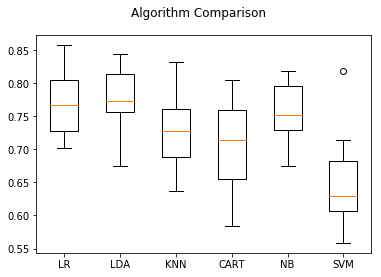

In [98]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv('dataset/pima-indians-diabetes.csv', names=names, header=0)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("name:", name, "results mean:", cv_results.mean(), "results std:", cv_results.std())

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

<h2>7.2 Workflow with Pipelines</h2>
<p>There are standard workflows in a machine learning project that can be automated. With Pipelines we can clearly define and automate these workflows, allowing to make a linear sequence of data transforms to be chained together culminating in a modeling process that can be evaluated.</p>
<p>The goal is to ensure that all of the steps in the pipeline are constrained to the data available for the evaluation, such as the training dataset or each fold of the cross validation procedure.</p>
We will see how:
<li>How to use pipelines to minimize data leakage.</li>
<li>How to construct a data preparation and modeling pipeline</li>
<li>How to construct a feature extraction and modeling pipeline.</li>

<h3>7.2.1 Data Preparation and Pipeline</h3>
<p>An easy trap to fall into in applied machine learning is leaking data from our training dataset to our test dataset.</p>
<p>To avoid this trap we need a robust test harness with strong separation of training and testing.<br>
Data preparation is one easy way to leak knowledge of the whole training dataset to the algorithm.<br>
For example, preparing our data using normalization or standardization on the entire training dataset before learning would not be a valid test because the training dataset would have been influenced by the scale of the data in the test set.</p>
<p>Pipelines help you prevent data leakage in your test harness by ensuring that data preparation like standardization is constrained to each fold of your cross validation procedure.</p>
<p>The pipeline is defined with two steps:
    <ol>
        <li>Standardize the data.</li>
        <li>Learn a Linear Discriminant Analysis model.</li>
    </ol>
</p>


In [121]:
# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# load data
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv('dataset/pima-indians-diabetes.csv', names=names, header=0)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))

model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()) # Stampa la media dei risultati delle varie kfold

0.773462064251538


<h3>7.2.2 Feature Extraction and Modeling Pipeline</h3>
<p>Feature extraction is another procedure that is susceptible to data leakage.<br>
Like data preparation, feature extraction procedures must be restricted to the data in your training dataset. The pipeline provides a handy tool called the FeatureUnion which allows the results of multiple feature selection and extraction procedures to be combined into a larger dataset on which a model can be trained. Importantly, all the feature extraction and the feature union occurs within each fold of the cross validation procedure.</p>
<p>The pipeline defined with four steps:
<ol>
    <li>Feature Extraction with Principal Component Analysis</li>
    <li>Feature Extraction with Statistical Selection</li>
    <li>Feature Union.</li>
    <li>Learn a Logistic Regression Model.</li>
</ol>
</p>

In [123]:
# Create a pipeline that extracts features from the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7760423786739576


<h1>8. Improving Performance</h1>


<h2>8.1 Ensamble</h2>
<p>Ensembles can give us a boost in accuracy on our dataset.</p>
<p>This lesson will step you through Boosting, Bagging and Majority Voting and show you how you can continue to ratchet up the accuracy of the models on your own datasets</p>
<p>The three most popular methods for combining the predictions from different models are:</p>
<ol>
    <li>Bagging: Building multiple models (typically of the same type) from different subsamples of the training dataset.</li>
<li>Boosting: Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the sequence of models.</li>
<li>Voting: Building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions.</li>
</ol>

<h3>8.1.1 Bagging Algorithms</h3>
<p>Bootstrap Aggregation (or Bagging) involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.</p>
<p>The final output prediction is averaged across the predictions of all of the sub-models.</p>

<h4>8.1.1.1 Bagged Decision Trees</h4>
<p>Bagging performs best with algorithms that have high variance (a popular example are decision trees, often constructed without pruning).</p>
<p>In the example below we will use the BaggingClassifier with the Classification and Regression Trees algorithm.</p>

In [126]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv('dataset/pima-indians-diabetes.csv', names=names, header=0)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.770745044429255


<h4>8.1.1.2 Random Forest</h4>
<p>Random Forests is an extension of bagged decision trees.<br>
Samples of the training dataset are taken with replacement, but the trees are constructed in a way that reduces the correlation between individual classifiers. Specifically, rather than greedily choosing the best split point in the construction of each tree, only a random subset of features are considered for each split.</p>

In [127]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=3)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7642344497607655


<h4>8.1.1.3 Extra Trees</h4>
<p>Extra Trees are another modification of bagging where random trees are constructed from samples of the training dataset.</p>

In [129]:
# Extra Trees Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

num_trees = 100
kfold = KFold(n_splits=10, random_state=7)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7733937115516063


<h3>8.1.2 Boosting Algorithms</h3>
<p>Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence. Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction. 
<p>The two most common boosting ensemble machine learning algorithms are:</p>
<ul>
    <li>AdaBoost</li>
    <li>Stochastic Gradient Boosting</li>

<h4>8.1.2.1 AdaBoost</h4>
<p>AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or less attention to them in the construction of subsequent models.</p>

In [130]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

num_trees = 30
kfold = KFold(n_splits=10, random_state=7)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.760457963089542


<h4>8.1.2.2 Stochastic Gradient Boosting</h4>
<p>Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps one of the best techniques available for improving performance via ensembles.</p>

In [141]:
# Stochastic Gradient Boosting Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

num_trees = 100
kfold = KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7669002050580999


<h3>8.1.3 Voting Ensamble</h3>
<p>Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset.</p>
<p>A voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.</p>
<p>The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult.</p>

In [139]:
# Voting Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

kfold = KFold(n_splits=10, random_state=7)
# create the sub models
estimators = []
estimators.append(('logistic', LogisticRegression()))
estimators.append(('cart', LinearDiscriminantAnalysis()))
estimators.append(('nb', GaussianNB()))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.7708304853041694


/Users/yukina/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yukina/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yukina/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/yukina/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

<h2>8.2 Improve Performance with Algorithm Tuning</h2>
<p>Machine learning models are parameterized so that their behavior can be tuned for a given problem.</p>
<p>Models can have many parameters and finding the best combination of parameters can be treated as a search problem.</p>
<p>There are three main strategies:</p>
<ul>
    <li>How to use a grid search algorithm tuning strategy</li>
    <li>How to use a random search algorithm tuning strategy.</li>
</ul>

<h3>8.2.1 Grid Search Parameter Tuning</h3>
<p>Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.</p>

In [142]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.2796175593129722
1.0


<h3>8.2.2 Random Search Parameter Tuning</h3>
<p>Random search is an approach to parameter tuning that will sample algorithm parameters from a random distribution (i.e. uniform) for a fixed number of iterations.</p>
<p>A model is constructed and evaluated for each combination of parameters chosen. A total of 100 iterations are performed with uniformly random alpha values selected in the range between 0 and 1 (the range that alpha values can take).</p>

In [143]:
# Randomized for Algorithm Tuning
import numpy
from pandas import read_csv
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=7)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

0.27961712703051095
0.9779895119966027


<h1>9. Save and Load Machine Learning Models</h1>
<p>Saving and load our machine learning model in Python using scikit-learn allows us to save your model to file and load it later in order to make predictions.</p>
<p>There are two main methods to do it:</p>
<ul>
    <li>Pickle</li>
    <li>Joblib</li>
</ul>

<h2>9.1 Pickle</h2>
<p>Pickle is the standard way of serializing objects in Python.</p>
<p>We can use it to serialize our machine learning algorithms and save the serialized format to a file. Later we can load this file to deserialize our model and use it to make new predictions.</p>

In [145]:
# Save Model Using Pickle
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)

# save the model to disk
filename = 'finalized_model.txt'
dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7559055118110236


<h2>9.2 Joblib</h2>
<p>The Joblib library is part of the SciPy ecosystem and provides utilities for pipelining Python jobs.</p>
<p>It provides utilities for saving and loading Python objects that make use of NumPy data structures, efficiently. This can be useful for some machine learning algorithms that require a lot of parameters or store the entire dataset (e.g. k-Nearest Neighbors).</p>

In [148]:
# Save Model Using joblib
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7) # Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)

# save the model to disk
filename = 'finalized_model.sav'
dump(model, filename)

# some time later...

# load the model from disk
loaded_model = load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

0.7559055118110236


<h2>9.3 Some Tips..</h2>
<p>When finalizing our machine learning models, taking a note of version of what are we using allow us to re-create the environment if for some reason we cannot reload your model on another machine or another platform at a later time.</p>

In particular:
<ul>
    <li>Take a note of python version</li>
    <li>Take a note of library version</li>
    <li>Manual Serialization: we might like to manually output the parameters of our learned model so that we can use them directly in scikit-learn or another platform in the future. Often the techniques used internally by machine learning algorithms to make predictions are a lot simpler than those used to learn the parameters can may be easy to implement in custom code that you have control over.</li>
</ul>